# Homework 5 - Explore Wikipedia's hyperlinks network
In this assignment we analyze the Wikipedia's articles network by applying graph algorithms.

[Homework 5](https://github.com/CriMenghini/ADM/tree/master/2020/Homework_5)

In [1]:
import pandas as pd
import networkx as nx
import csv
import matplotlib.pyplot as plt 
from collections import defaultdict
import numpy as np
import pickle 

### General notes

* You will notice that one article might belong to a single category or multiple ones. In the case of multiple appearance, you break the ties uniformly at random. Please, do it before solving any task in the homework.

* The algorithms should handle exceptions, e.g. what if there is no path between two nodes?

In [11]:
wikigraph_reduced = pd.read_csv('wikigraph_reduced.csv', sep='\t', index_col=0)

*Every row indicates an edge. In particular, the two elements are the source and the target, respectively.*

In [12]:
wikigraph_reduced = wikigraph_reduced.rename(columns={'0': 'Source', '1': 'Target'})
wikigraph_reduced

Source   Target
796            95  1185516
909           108  1059989
910           108  1062426
911           108  1161925
1141          134   541222
...           ...      ...
28511768  1791481  1060990
28511769  1791481  1061382
28511771  1791481  1110380
28511772  1791482    80740
28511785  1791484   235100

[483094 rows x 2 columns]

In [13]:
#create dictionary of the pages and their links

pages_dict = defaultdict(list)
with open('wiki-topcats-categories.txt') as f:
    for row in f.readlines():
        split = row.split()
        first_el = split[0]
        category = first_el[9:-1]
        pages = split[1:]
        #print(category)
        #print(pages)
        for j in pages:
            pages_dict[category].append(j)
        #print(page_dict)
        #break       

In [14]:
#pages_dict

In [15]:
#create dictionary of the pages and their names

pages_name_dict = {}
with open('wiki-topcats-page-names.txt') as f:
    for row in f.readlines():
        split = row.split()
        page_number = int(split[0])
        #print(page_number)
        page_name = ' '.join(split[1:])
        #print(page_name)
        
        pages_name_dict[page_number] = page_name
        #print(pages_name_dict)     

In [16]:
#pages_name_dict

In [17]:
#scrivere spiegazioni sul random cut!

In [2]:
with open('chosen_categories.pkl', 'rb') as f:
    chosen_categories = pickle.load(f)

In [3]:
chosen_categories

category  \
0                                         Buprestoidea   
1                                People_from_Worcester   
2      Skin_conditions_resulting_from_physical_factors   
3                                     Visual_kei_bands   
4                           Japanese_rock_music_groups   
...                                                ...   
17359                   British_science_fiction_novels   
17360                           Television_soundtracks   
17361                         Diptera_of_North_America   
17362                                  Diptera_of_Asia   
17363                                       Tachinidae   

                                                   pages  
0      [301, 302, 303, 304, 305, 306, 307, 308, 309, ...  
1      [1057, 1058, 1059, 60971, 76515, 76871, 78094,...  
2      [971, 973, 1166, 1167, 1168, 1169, 1170, 1171,...  
3      [1297, 1300, 1313, 1314, 1315, 1316, 1319, 132...  
4      [1389, 1397, 1399, 1400, 1402, 1408, 1409, 141...  
...                                                  ...  
17359  [24545, 158425, 165104, 220710, 354005, 418467...  
17360  [1117, 110192, 110377, 110395, 137001, 140323,...  
17361  [280, 31110, 31139, 31143, 31146, 31163, 31179...  
17362  [279, 31129, 31133, 31134, 31135, 31136, 31137...  
17363  [429765, 429776, 860398, 1427707, 1427710, 142...  

[17360 rows x 2 columns]

## RQ1
Build the graph G=(V, E), where V is the set of articles and E the hyperlinks among them. Then, provide its basic information:

* Is the graph directed?
* How many articles are we considering?
* How many hyperlinks between pages exist?
* Compute the average number of links in an arbitrary page. What is the graph density? Do you believe that the graph is dense or sparse? Is the graph dense?
* Visualize the nodes' degree distribution

**Build the graph**

1. Create the graph as a dictionary

In [20]:
def my_graph_dict(directory):
    '''
    function to create a graph starting from a file
    input: file
    output: graph
    '''
    graph_dict = defaultdict(list)
    
    file_handler = open(directory, "r", encoding = "utf-8")
    reader = csv.reader(file_handler, delimiter = "\t", quotechar = '"', 
                           quoting = csv.QUOTE_NONE)
    
    next(reader)
    for record in reader:
        source = int(record[1])
        target = int(record[2])
        
        graph_dict[source].append(target)
        
    return graph_dict
    
    

In [21]:
directory = 'wikigraph_reduced.csv'
graph_dict = my_graph_dict(directory)

2. Create graph with networkx library

We directly create a DiGraph because we see it is directed.

In [22]:
wiki_reduced = nx.from_pandas_edgelist(wikigraph_reduced, 'Source', 'Target', create_using = nx.DiGraph )

In [23]:
wiki_reduced

### a) Is the graph directed?

"*a directed graph (or digraph) is a graph that is made up of a set of vertices connected by edges, where the edges have a direction associated with them.*"

We check if a link exists in both the direction from the node to the source, if it's true the graph in **undirected**, otherwise is **directed**.


In [24]:
def check_directed(graph):
    '''
    function to check if a graph is directed
    input: graph
    output: boolean True/False
    '''
    
    for key, value in graph_dict.items():
        for dest in value:
            if key in graph_dict[dest]:
                directed = False
                return directed
            else:
                directed = True
                return directed
    

In [25]:
risp = check_directed(graph_dict)

print('Is the graph directed?\n', risp)

Is the graph directed?
 True


Check with nx

In [26]:
nx.is_directed(wiki_reduced)

True

### b) How many articles are we considering?

"graph G=(V, E), where V is the set of articles and E the hyperlinks among them"

So, V is the set of vertices and E is the set of edges

In [27]:
#From column to list of source nodes
source_list = wikigraph_reduced['Source'].tolist()

In [28]:
#From column to list of target nodes
target_list = wikigraph_reduced['Target'].tolist()

In [29]:
#the sum of all the source and target nodes is the total amount of the vertices 
all_vertices = source_list + target_list

In [30]:
#delete repetition 
all_vertices = len(set(all_vertices))

In [31]:
print('Number of articles: ', all_vertices)

Number of articles:  98343


Check with nx

In [32]:
wiki_reduced.number_of_nodes()

98343

### c) How many hyperlinks between pages exist?

In [33]:
#as specified, each row of the file "wikigraph_reduced.csv" is an edge
hyperlinks = len(wikigraph_reduced)

In [34]:
print('Number of hyperlinks: ',hyperlinks)

Number of hyperlinks:  483094


Check with nx

In [35]:
wiki_reduced.number_of_edges()

483094

### d) Compute the average number of links in an arbitrary page. What is the graph density? Do you believe that the graph is dense or sparse? Is the graph dense?

Graph density for directed graph:  ${\displaystyle D={\frac {|E|}{|V|(|V|-1)}}}$

In [36]:
density =  hyperlinks / (all_vertices * (all_vertices - 1))
print('The graph density is: ',density)

The graph density is:  4.9951571365597335e-05


Check with nx

In [24]:
nx.density(wiki_reduced)

4.9951571365597335e-05

### e) Visualize the nodes' degree distribution

In [25]:
#Some info about our graph
nx.info(wiki_reduced)

'Name: \nType: DiGraph\nNumber of nodes: 98343\nNumber of edges: 483094\nAverage in degree:   4.9123\nAverage out degree:   4.9123'

We decided to plot three different degree distributions: 

1. Total
2. Out degree
3. In degree

We use also networkx library to check if our dictionary with in,out and total degree are the same of the nx ones.

**Degree out**

In [26]:
node_degree_out = wiki_reduced.out_degree()

In [40]:
degree_out = defaultdict(int)

for i in graph_dict.keys():
    degree_out[i] = len(graph_dict[i])


In [41]:
with open('C:\\Users\\francesca.casarano\\Documents\\Master\\ADM\\HW5\\degree_out.pkl', 'wb') as f:
    pickle.dump(degree_out, f)

In [27]:
with open('degree_out.pkl', 'rb') as f:
    degree_out = pickle.load(f)

In [ ]:
degree_out

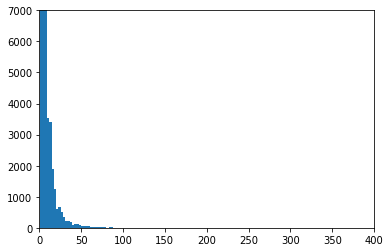

In [88]:
x = list(degree_out.keys())
y = list(degree_out.values())

plt.hist(y, bins = 500)
plt.ylim(0, 7000)
plt.xlim(0, 400)
plt.show()

**Degree in**

In [29]:
node_degree_in = wiki_reduced.in_degree()

In [44]:
degree_in = defaultdict(int)

for i in wiki_reduced.nodes:
    degree_in[i] = sum([1  for elem in graph_dict.values() if i in elem])
    

In [45]:
with open('C:\\Users\\francesca.casarano\\Documents\\Master\\ADM\\HW5\\degree_in.pkl', 'wb') as f:
    pickle.dump(degree_in, f)

In [30]:
with open('degree_in.pkl', 'rb') as f:
    degree_in = pickle.load(f)

In [ ]:
degree_in

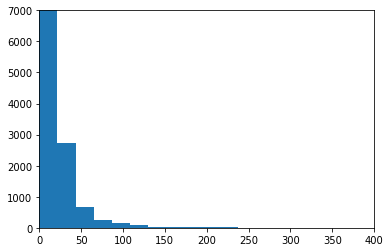

In [89]:
x = list(degree_in.keys())
y = list(degree_in.values())

plt.hist(y, bins = 500)
plt.ylim(0, 7000)
plt.xlim(0, 400)
plt.show()

**Total degree**

In [32]:
node_degree_tot = nx.degree(wiki_reduced)
#node_degree_tot = (dict(node_degree_tot))

In [108]:
type(wiki_reduced.nodes)

networkx.classes.reportviews.NodeView

In [49]:
degree_tot = defaultdict(int)

for i in wiki_reduced.nodes:
    try:
        degree_tot[i] = degree_out[i] + degree_in[i] 
    except:
        try:
            degree_tot[i] = degree_out[i]
        except:
            try:
                degree_tot[i] = degree_in[i]
            except:
                degree_tot[i] = 0

In [50]:
with open('C:\\Users\\francesca.casarano\\Documents\\Master\\ADM\\HW5\\degree_tot.pkl', 'wb') as f:
    pickle.dump(degree_tot, f)

In [33]:
with open('degree_tot.pkl', 'rb') as f:
    degree_tot = pickle.load(f)

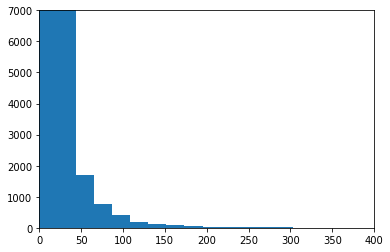

In [90]:
x = list(degree_tot.keys())
y = list(degree_tot.values())


plt.hist(y, bins = 500)
plt.ylim(0, 7000)
plt.xlim(0, 400)
plt.show()

Here we check, randomly, if specified node has the same in/out/tot degree of the one computed with networkx

In [114]:
rand_choice = np.random.choice(wiki_reduced.nodes, 3)

for i in rand_choice:
    print('\nRandom node chosen:', i)
    print('Total degree as computed by us and by networkx, respectively:', degree_tot[i], node_degree_tot[i])
    print('Out degree as computed by us and by networkx, respectively:', degree_out[i], node_degree_out[i])
    print('In degree as computed by us and by networkx, respectively:', degree_in[i], node_degree_in[i])


Random node chosen: 382198
Total degree as computed by us and by networkx, respectively: 2 2
Out degree as computed by us and by networkx, respectively: 2 2
In degree as computed by us and by networkx, respectively: 0 0

Random node chosen: 88881
Total degree as computed by us and by networkx, respectively: 8 8
Out degree as computed by us and by networkx, respectively: 7 7
In degree as computed by us and by networkx, respectively: 1 1

Random node chosen: 80774
Total degree as computed by us and by networkx, respectively: 3 3
Out degree as computed by us and by networkx, respectively: 3 3
In degree as computed by us and by networkx, respectively: 0 0


### RQ2
Define a function that takes in input:

* A page v
* A number of clicks d

and returns the set of all pages that a user can reach within d clicks.

In [40]:
def BFS_click(graph, d, v):
    '''
    recursive function  used to find the pages reachable in a given number of clicks
    input:graph, number of clicks d, page v
    output: touple of all pages that a user can reach within d clicks
    '''
    
    if d == 1:
        new_visited_nodes = graph[v]
        return visited_nodes, np.array(new_visited_nodes).shape[0]
    if d == 2:
        new_visited_nodes = [elem for i in graph[v] for elem in graph[i] if elem not in graph[v]]
        return graph[v] + new_visited_nodes, np.array(new_visited_nodes).shape[0]
    if d >= 3:
        new_visited_nodes = [elem for i in BFS_click(graph, d-1, v)[0][-BFS_click(graph, d-1, v)[1]:] for elem in graph[i] if elem not in BFS_click(graph, d-1, v)[0]]
        
        return BFS_click(graph, d-1, v)[0] + new_visited_nodes, np.array(new_visited_nodes).shape[0]

In [41]:
def find_set_of_pages(graph):
    '''
    function that use BFS_click to find the set of the reachable pages
    input: graph
    output:  set with all the pages a user can reach wiith d clicks
    '''
    print('Choose a page number:')
    v = int(input())
    
    print('Choose a number of clicks')
    d = int(input())
    
    set_pages = DFS_click(graph_dict, d, v)[0]
    set_pages = list(set(set_pages))
    set_pages.sort()
    
    return set_pages

In [42]:
set_pages = find_set_of_pages(graph_dict)

Choose a page number:
95
Choose a number of clicks
3


Set of all pages that a user can reach within d clicks:

In [ ]:
set_pages

We decided to print the names of the pages

In [86]:
set_pages_names = []
for p in set_pages:
    name = pages_name_dict[p]
    set_pages_names.append(name)

In [87]:
set_pages_names

['Tina Fey',
 'Savion Glover',
 '22nd Century Lifestyle',
 'Jennifer Syme',
 'Issues 101',
 'Deep Throat (film)',
 'Phantasmagoria: The Visions of Lewis Carroll',
 'Portrait of an American Family',
 'Dwayne Johnson',
 'Maya Angelou',
 'Wood Harris',
 'Steve Rhodes (journalist)',
 'The Heart Is Deceitful Above All Things',
 'Dead Man on Campus',
 'Detroit Rock City (film)',
 'Mark Dacascos',
 'Rise: Blood Hunter',
 'S.F.W.',
 'Niagara (1953 film)',
 'Nowhere (film)',
 'The Parent Trap (1961 film)',
 'Confessions of a Teenage Drama Queen',
 'Saw II',
 'Shannon Elizabeth',
 'House of Wax (2005 film)',
 'Party Monster (2003 film)',
 'Judy Greer',
 'The Rugrats Movie',
 'Just My Luck (2006 film)',
 'Georgia Rule',
 'Freaky Friday (2003 film)',
 'The Parent Trap (1998 film)',
 'Rose McGowan',
 'Natasha Richardson',
 'Seann William Scott',
 'Felicity Huffman',
 'Bobby (2006 film)',
 'Jared Leto',
 'Chazz Palminteri',
 'Evan Rachel Wood',
 'Lily Tomlin',
 'Jaws (film)',
 'Chicago (2002 film)',

Check if our function works as the in-built one

In [52]:
elements = list(nx.bfs_edges(wiki_reduced, source=95, depth_limit=3))
nx_bfs = list(list(zip(*elements))[1])
nx_bfs.sort()

In [53]:
set_pages == nx_bfs

True

### RQ6
Write a function that sorts the categories in the graph according to their PageRank (PR). For this task you need to model the network of categories such that you can apply the PR algorithm.

In [4]:
#DataFrame of the categories chosen according to the "general notes"
chosen_categories

category  \
0                                         Buprestoidea   
1                                People_from_Worcester   
2      Skin_conditions_resulting_from_physical_factors   
3                                     Visual_kei_bands   
4                           Japanese_rock_music_groups   
...                                                ...   
17359                   British_science_fiction_novels   
17360                           Television_soundtracks   
17361                         Diptera_of_North_America   
17362                                  Diptera_of_Asia   
17363                                       Tachinidae   

                                                   pages  
0      [301, 302, 303, 304, 305, 306, 307, 308, 309, ...  
1      [1057, 1058, 1059, 60971, 76515, 76871, 78094,...  
2      [971, 973, 1166, 1167, 1168, 1169, 1170, 1171,...  
3      [1297, 1300, 1313, 1314, 1315, 1316, 1319, 132...  
4      [1389, 1397, 1399, 1400, 1402, 1408, 1409, 141...  
...                                                  ...  
17359  [24545, 158425, 165104, 220710, 354005, 418467...  
17360  [1117, 110192, 110377, 110395, 137001, 140323,...  
17361  [280, 31110, 31139, 31143, 31146, 31163, 31179...  
17362  [279, 31129, 31133, 31134, 31135, 31136, 31137...  
17363  [429765, 429776, 860398, 1427707, 1427710, 142...  

[17360 rows x 2 columns]

In [5]:
#dictionary created from the dataframe with category as key and the list of all the related pages as values
categories_dict = dict(chosen_categories.values.tolist())

In [6]:
#categories_dict

In [7]:
with open('opposite_dict.pkl', 'rb') as f:
    opposite_dict = pickle.load(f)

In [12]:
opposite_dict

defaultdict(list,
            {95: [],
             1185516: [95, 1198096, 1230864],
             108: [],
             1059989: [108,
              137144,
              374066,
              635998,
              688704,
              688741,
              689109,
              1015403,
              1054071,
              1056157,
              1058789,
              1059236,
              1059694,
              1059782,
              1059988,
              1060168,
              1060884,
              1061024,
              1063534,
              1084038,
              1084042,
              1141095,
              1161925,
              1162809,
              1163419,
              1163900,
              1164210,
              1164977,
              1632839],
             1062426: [108,
              422996,
              479798,
              628169,
              1032867,
              1032868,
              1054394,
              1055563,
              1059383,
              106

In [9]:
with open('category_related_nodes.pkl', 'rb') as f:
    category_related_nodes = pickle.load(f)

In [13]:
category_related_nodes

defaultdict(list,
            {219: [],
             232: [1059479,
              1060163,
              1060236,
              1060389,
              1060458,
              1062583,
              1062788,
              1063581,
              1064559,
              1065529,
              1074136,
              1078870,
              612403,
              1062246],
             233: [],
             234: [1003389,
              540190,
              835102,
              1262005,
              1326708,
              1400478,
              1408243,
              1409648,
              63118,
              1262006,
              1409648,
              1410174],
             305: [27676,
              27481,
              27492,
              28054,
              104612,
              27200,
              27528,
              27676,
              1448740,
              1638964,
              27676,
              27676,
              27676,
              27676,
              736365,
       

In [11]:
with open('category_counter.pkl', 'rb') as f:
    category_counter = pickle.load(f)

In [45]:
#category_counter